Task 6 was to produce multiple random walks with different starting positions and then plot their average displacements as the radius of circles at the vertices of the square as shown in figure 1 of the coursework brief. 

Rav1: 27.13346291113918
Rav2: 28.85792984334565
Rav3: 28.391459444079484
Rav4: 28.992190179072985
runtime: 1.2032268047332764 seconds


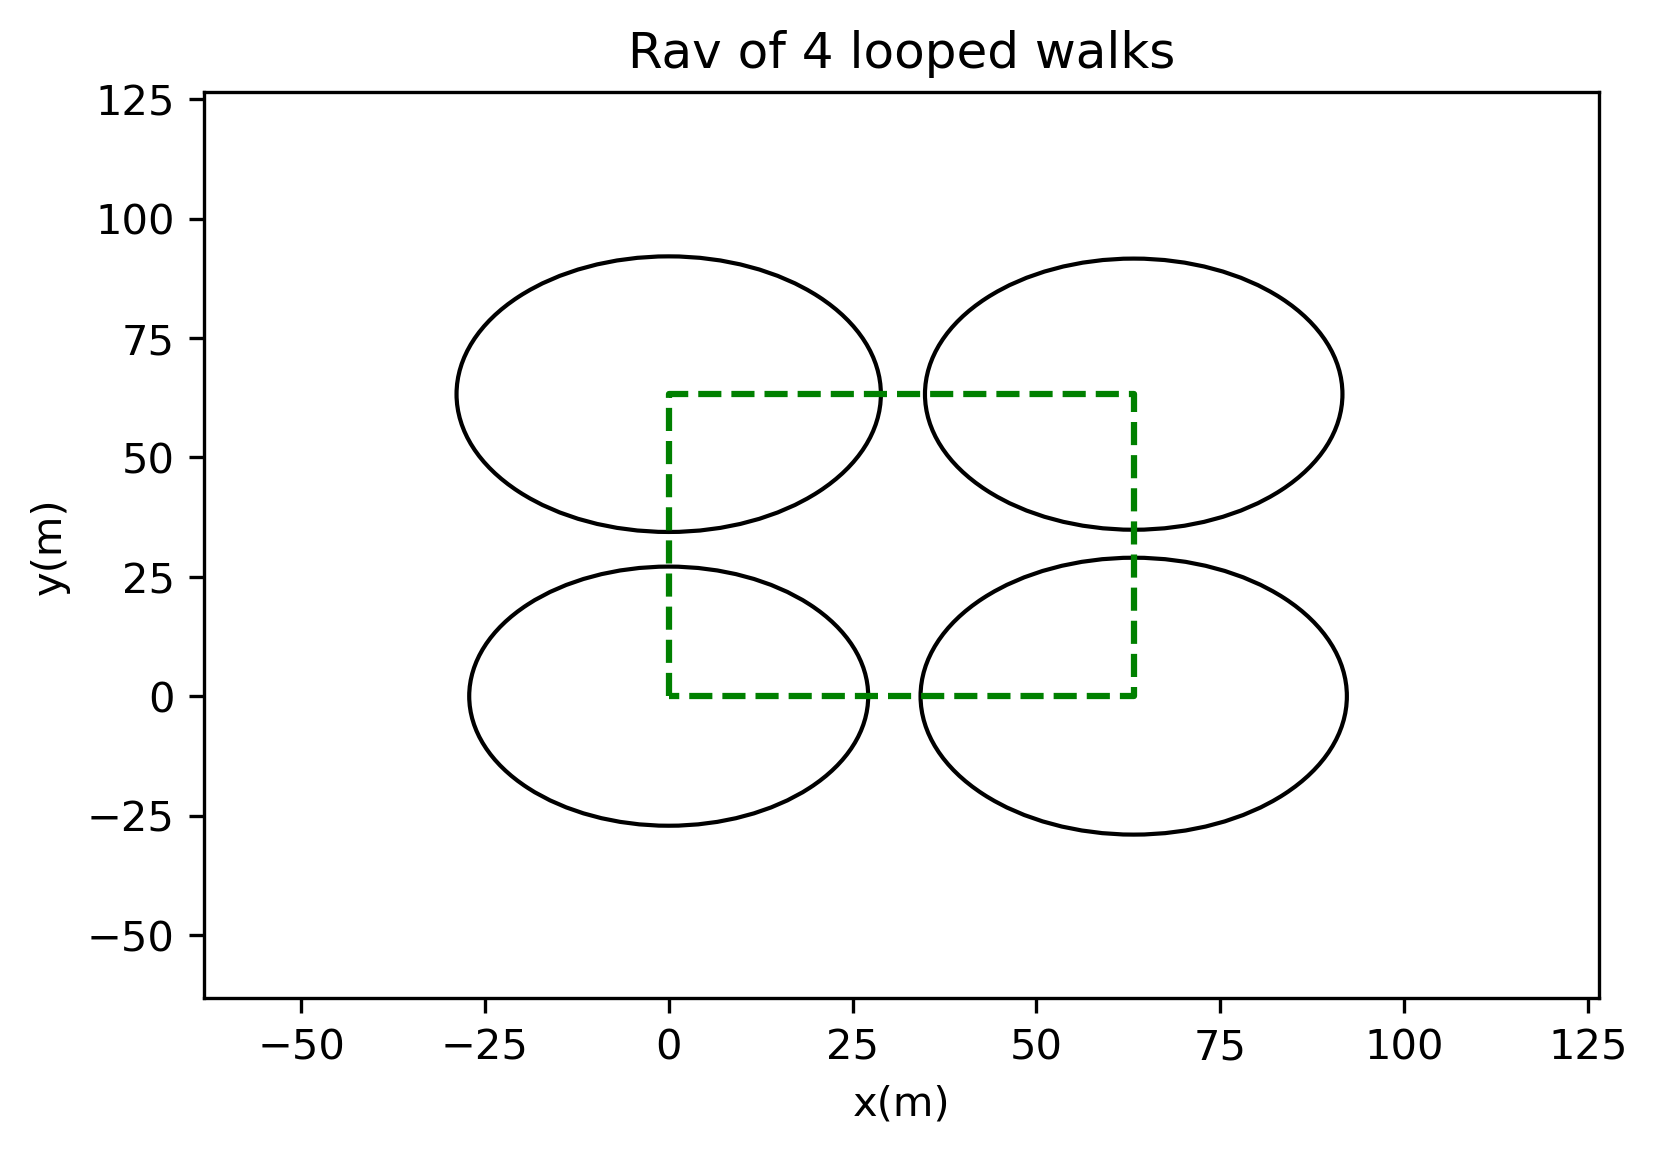

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import random
import time as t

start = t.time()#start time counter

plt.rcParams['figure.dpi'] = 300#increases resolution of matplotlib plots

step = 1000#number of steps in walk, i.e self.steps
loop = 100#to be passes as number of walks, i.e self.walks
edge = (np.sqrt(step)*2)#size of the sides on the square


class ranWalk():
    
    def __init__(self,steps,xs,ys):#initialisation parameters of the class
        self.steps = steps#number of steps
        self.xc = xs#starting position in x
        self.yc = ys#starting position in y
        
    def genWalk(self):
        self.X = []#position list for x coords
        self.Y = []#position list for y coords
        self.X.append(self.xc)#appending start positions to position lists
        self.Y.append(self.yc)
        for i in range(0,self.steps):
            self.xa = (random.random()-0.5)*2#generates random step size in x direction
            self.ya = (random.random()-0.5)*2#generates random step size in y direction
            self.normalise = np.sqrt(((self.xa)**2) + ((self.ya)**2))#normalisation factor, for equal step size magnitude
            self.xc += self.xa/self.normalise#applying normalisation factor to x step
            self.yc += self.ya/self.normalise#applying normalisation factor to y step
            self.X.append(self.xc)#appends x position to position list
            self.Y.append(self.yc)#appends y position to position list
        return self.X,self.Y
    
    """
    Generates a walk with equal step sizes in pseudo
    random directions from a speciefied starting
    position. Magnitude of all step sizes is 1.
    """
        
    def scalarAver(self):
        dy = (self.Y[-1]-self.Y[0])**2#last value in y position array minus first value
        dx = (self.X[-1]-self.X[0])**2#last value in x position array minus first value
        self.Rav = np.sqrt(dy + dx)
        return self.Rav
    
    """
    Above function calculates the scalar distance 
    from the starting position for a random walk.
    Uses equation from session 4 lecture notes on learn.
    """
    
    def plotWalk(self):
        plt.plot(self.X,self.Y, 'g--')
        plt.show()
        
    """
    Above function plots the walk
    """
    
    def loopWalk(self,walks):
        self.walks = walks#number of walks
        self.Rtot = 0#scalar distance total
        for i in range(0,self.walks):
            ranWalk.genWalk(self)#generates the walk
            foo = ranWalk.scalarAver(self)#scalar distance for the walk just generated
            self.Rtot += foo#added to total
            #ranWalk.plotWalk(self)#testing if plots walks are being run
        return (self.Rtot/self.walks)
    
    """
    Above function runs generates a walk of self.steps step size,
    self.walks number of times. It also gets the scalar
    distance for each walk and divides that by the number of walks
    generated to give the average scalar distance for walks
    from a set position of a set step size. In theory this average
    should be equal to the square root of the step size.
    """
    
    
def main():
    x = [0,0,edge,edge,0]#x coords for plotting square
    y = [0,edge,edge,0,0]#y coords for plotting square

    vertex1 = ranWalk(step,0,0)
    Avg1 = vertex1.loopWalk(loop)
    print("Rav1:",Avg1)

    vertex2 = ranWalk(step,0,edge)
    Avg2 = vertex2.loopWalk(loop)
    print("Rav2:",Avg2)

    vertex3 = ranWalk(step,edge,edge)
    Avg3 = vertex3.loopWalk(loop)
    print("Rav3:",Avg3)

    vertex4 = ranWalk(step,edge,0)
    Avg4 = vertex4.loopWalk(loop)
    print("Rav4:",Avg4)
    
    """
    The vertex lines create objects
    The Avg variables call loopWalk and store the returned
    value of Rav. The print lines are there to see the exact values
    of Rav for each different starting point.
    """
    
    plt.plot(x,y, 'g--')#plots the square
    
    circle1 = plt.Circle((0, 0), Avg1, fill=False)
    circle2 = plt.Circle((0, edge), Avg2, fill=False)
    circle3 = plt.Circle((edge, edge), Avg3,  fill=False)
    circle4 = plt.Circle((edge, 0), Avg4,  fill=False)
    
    """
    Plots the circles with radius of Rav(Avg) for each object
    at each of the vertices.
    """

    fig = plt.gcf()
    ax = fig.gca()
    ax.set_xlabel('x(m)')
    ax.set_ylabel('y(m)')
    ax.set_title('Rav of 4 looped walks')
    
    """
    Above sets the plots on the same figure. Then sets the axes labels
    and title.
    """

    ax.set_xlim((-edge, edge*2))
    ax.set_ylim((-edge, edge*2))
    
    """
    Above sets the size of axes.
    """

    ax.add_patch(circle1)
    ax.add_patch(circle2)
    ax.add_patch(circle3)
    ax.add_patch(circle4)
    
    """
    Addds the circles to the plot.
    """

main()#executes the program
end = t.time()#end time counter
print("runtime: %s seconds" % (end - start))#program execution time

To make the make it so that the circles do not merge, the sides of the square have to be of size 2*(N^(1/2)). This is because the circle radius is theoretically N^(1/2). So if the sides of the square are two times this then they should just about be touching. In practice this does not happen most of the time. Also the limits of the axes are set such that approximately N^(1/2) is left around them so that the graph is centred. If the sides of the square were defined as slightly less that 2*(N^(1/2)) then the circles would merge.